# KING COUNTY HOUSE PRICE PREDICTION
## Using Simple Linear Regression, Linear Regression with Polynomial Features, Ridge/Lasso/ElasticNet
[![house](https://github.com/kevinchenkc/King-County-House-Price-Prediction/blob/main/Leader_91.jpg?raw=True)](https://www.kcha.org/business/property)

<hr>

## 1. Data Understanding and Data Wrangling

In [83]:
## Import Package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Dataset source: [kaggle.com](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

In [84]:
## Import Data
df=pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [85]:
## Check Missing Value
df.isna().sum()
## Result: no missing value

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [86]:
## Double Check for Missing Value
df.info()
## Result: Confirmed no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [87]:
## Define Data Type per Column
df.dtypes
## Result: all columns are numeric, only date is object (need to be converted into datetime type)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [88]:
## Data Type Conversion
df['date']=pd.to_datetime(df['date'])

## Confirm Conversion Result
df.dtypes
## Result: date column has been converted into datetime type

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [89]:
## Describe Data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<hr>

## 2. Data Preparation

In [90]:
## Describe columns
df.head()
## Insight: We had plenty information to work with.
### Therefore, we do not need to additional features from the current feature to help us doing better analysis
#### Instead, we need to decide project limitation and drop columns we dont use

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 2.1 Feature Extraction - Date

In [91]:
## Assign datetime function to variable
date_dt=df['date'].dt

In [92]:
## Extract Years
df['year']=date_dt.year

## Extract Month
df['month']=date_dt.month

## Extract Day
df['day']=date_dt.day

## Drop Original Date Column
df.drop(columns='date',inplace=True)

### 2.2 Feature Selection with Heatmap

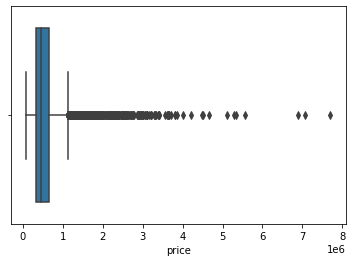

In [93]:
## Check Outliers Price (target)
sns.boxplot(df['price'])
plt.show()
## Result: There are outliers

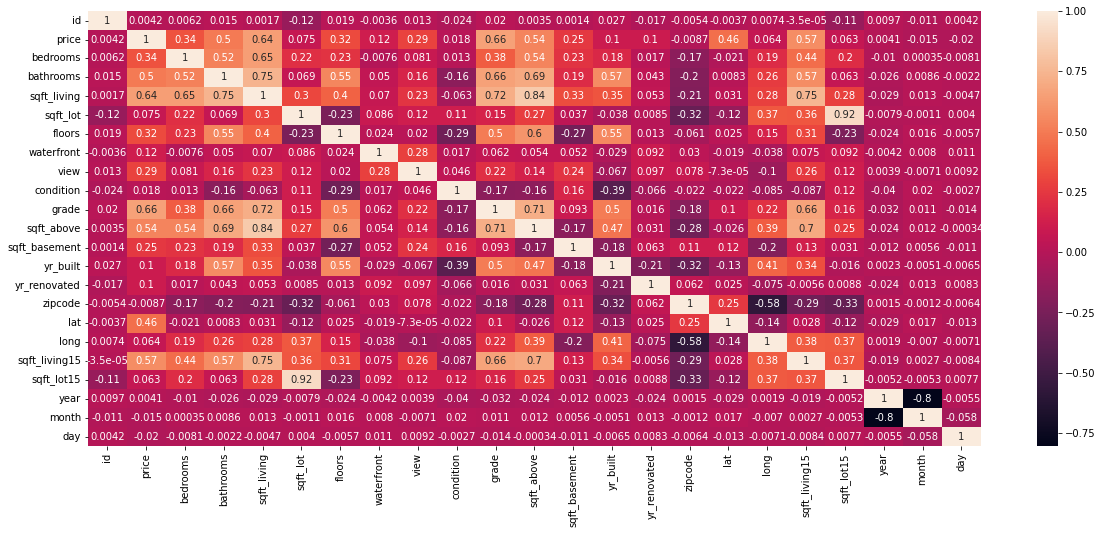

In [94]:
## Correlation Test with HeatMap
plt.figure(figsize=(20,8))
sns.heatmap(df.corr('spearman'),annot=True)
plt.show()
## Result: Use spearman (outliers detected), we only analyze correlation all columns with 'price'.

- Feature Selection Process:
    - We only analyze correlation of columns with 'price' (target)
    - We see that columns with lighter colour (higher correlation) ranged around 0.46 - 0.66, therefore we only picked columns with correlation above 0.46 as our features 

In [95]:
## Drop Columns with low correlation to 'price'
df.drop(columns=(['id','bedrooms','sqft_lot','floors',
                'waterfront','view','condition','sqft_basement',
                'yr_built','yr_renovated','zipcode','lat','long',
                'sqft_lot15','year','month','day'
                ]),
                inplace=True)

### 2.2 Show updated DataFrame

In [96]:
df.head()

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,1.00,1180,7,1180,1340
1,538000.0,2.25,2570,7,2170,1690
2,180000.0,1.00,770,6,770,2720
3,604000.0,3.00,1960,7,1050,1360
4,510000.0,2.00,1680,8,1680,1800


<hr>

## 3. Machine Learning

### 3.1 Splitting Data

In [97]:
## Import package
from sklearn.model_selection import train_test_split

In [98]:
## Define features and target
x=df.drop(columns='price')
y=df['price']

In [99]:
## Split Data with proportion of 85% train : 15% test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

### 3.2 Machine Learning Modelling

In [100]:
## Import package
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#### 3.2.1 Build Model

In [101]:
## Build Base Model
Model_LR=LinearRegression(fit_intercept=False) # when all features have value of 0, price (target) must be 0 too -> no transactions
Model_P=PolynomialFeatures(degree=4,include_bias=False,interaction_only=True)
Model_P_LR=LinearRegression(fit_intercept=False)
Model_R=Ridge()
Model_L=Lasso()
Model_E=ElasticNet()

In [102]:
# Learning Model -> finding pattern from question-answer of Training Data
Model_LR.fit(x_train,y_train)
Model_P.fit(x_train,y_train)
Model_R.fit(x_train,y_train)
Model_L.fit(x_train,y_train)
Model_E.fit(x_train,y_train)

ElasticNet()

In [103]:
## Assign transformed training and testing set into variables for Polynomial Model
x_train_poly=Model_P.transform(x_train)
x_test_poly=Model_P.transform(x_test)

In [116]:
## Learning Model for Linear Regression after Polynomial Features
Model_P_LR.fit(x_train_poly,y_train)

LinearRegression(fit_intercept=False)

In [117]:
## Predicted Target
pred_test_LR=Model_LR.predict(x_test)
pred_test_P_LR_train=Model_P_LR.predict(x_train_poly)
pred_test_P_LR_test=Model_P_LR.predict(x_test_poly)
pred_test_R=Model_R.predict(x_test)
pred_test_L=Model_L.predict(x_test)
pred_test_E=Model_E.predict(x_test)

#### 3.2.2 Training Model

In [106]:
## Describe shape of train features
x_train.shape

(18371, 5)

In [107]:
## Show train features
x_train.head()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
11464,2.5,1770,7,1770,1770
8928,2.5,3360,9,3360,3400
10852,2.5,1910,8,1910,2230
1571,1.5,2000,7,1170,1940
9806,2.5,1980,7,1980,1610


In [108]:
## Convert train features to DataFrame
df_x_train=pd.DataFrame(x_train)
df_x_train.head()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
11464,2.5,1770,7,1770,1770
8928,2.5,3360,9,3360,3400
10852,2.5,1910,8,1910,2230
1571,1.5,2000,7,1170,1940
9806,2.5,1980,7,1980,1610


#### 3.2.3 Testing Model

In [109]:
## Describe shape of test features
x_test.shape

(3242, 5)

In [110]:
## Show test features
x_test.head()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
19694,2.50,2320,7,2320,2150
11436,3.50,1480,7,1300,1140
21331,2.50,2623,8,2623,2010
4950,2.25,2340,8,2340,2140
784,2.75,3610,8,3610,2560


In [118]:
## Convert test features to DataFrame
df_x_test=pd.DataFrame(x_test)
df_x_train_poly=pd.DataFrame(x_train_poly)
df_x_test_poly=pd.DataFrame(x_test_poly)

#### 3.2.4 Prediction with Training and Testing Model

In [119]:
## Predict with every Model
LR_train=Model_LR.predict(df_x_train)
LR_test=Model_LR.predict(df_x_test)

P_LR_train=Model_P_LR.predict(df_x_train_poly)
P_LR_test=Model_P_LR.predict(df_x_test_poly)

R_train=Model_R.predict(df_x_train)
R_test=Model_R.predict(df_x_test)

L_train=Model_L.predict(df_x_train)
L_test=Model_L.predict(df_x_test)

E_train=Model_E.predict(df_x_train)
E_test=Model_E.predict(df_x_test)

### 3.3 Evaluation Matrix

#### 3.3.1 Check and Compare Evaluation Matrix Score for each Models

In [113]:
## Create function for evaluation matrix
def Eva_Matrix(Model,x,y_true):
    y_pred=Model.predict(x)
    R2=r2_score(y_true,y_pred)
    MAE=mean_absolute_error(y_true,y_pred)
    MSE=mean_squared_error(y_true,y_pred)
    RMSE=np.sqrt(MSE)
    return R2,MAE,MSE,RMSE

In [120]:
## Linear Regression Training
r2_LR_Train,MAE_LR_Train,MSE_LR_Train,RMSE_LR_Train=Eva_Matrix(Model_LR,x_train,y_train)
## Linear Regression Testing
r2_LR_Test,MAE_LR_Test,MSE_LR_Test,RMSE_LR_Test=Eva_Matrix(Model_LR,x_test,y_test)
## Linear Regression with Polynomial Features Training
r2_P_LR_Train,MAE_P_LR_Train,MSE_P_LR_Train,RMSE_P_LR_Train=Eva_Matrix(Model_P_LR,x_train_poly,y_train)
## Linear Regression with Polynomial Features Training
r2_P_LR_Test,MAE_P_LR_Test,MSE_P_LR_Test,RMSE_P_LR_Test=Eva_Matrix(Model_P_LR,x_test_poly,y_test)
## Ridge Training
r2_Ridge_Train,MAE_Ridge_Train,MSE_Ridge_Train,RMSE_Ridge_Train=Eva_Matrix(Model_R,x_train,y_train)
## Ridge Testing
r2_Ridge_Test,MAE_Ridge_Test,MSE_Ridge_Test,RMSE_Ridge_Test=Eva_Matrix(Model_R,x_test,y_test)
## Lasso Training
r2_Lasso_Train,MAE_Lasso_Train,MSE_Lasso_Train,RMSE_Lasso_Train=Eva_Matrix(Model_L,x_train,y_train)
## Lasso Testing
r2_Lasso_Test,MAE_Lasso_Test,MSE_Lasso_Test,RMSE_Lasso_Test=Eva_Matrix(Model_L,x_test,y_test)
## ElasticNet Training
r2_Elasticnet_Train,MAE_Elasticnet_Train,MSE_Elasticnet_Train,RMSE_Elasticnet_Train=Eva_Matrix(Model_E,x_train,y_train)
## ElasticNet Testing
r2_Elasticnet_Train,MAE_Elasticnet_Train,MSE_Elasticnet_Train,RMSE_Elasticnet_Train=Eva_Matrix(Model_E,x_test,y_test)

In [122]:
## EVALUATION MATRIX COMPARISON
eva_matrix={
    'Linear Regression Training':[r2_LR_Train,MAE_LR_Train,MSE_LR_Train,RMSE_LR_Train],
    'Linear Regression Testing':[r2_LR_Test,MAE_LR_Test,MSE_LR_Test,RMSE_LR_Test],
    'LinReg after Polynomial Features Training':[r2_P_LR_Train,MAE_P_LR_Train,MSE_P_LR_Train,RMSE_P_LR_Train],
    'LinReg after Polynomial Features Testing':[r2_P_LR_Test,MAE_P_LR_Test,MSE_P_LR_Test,RMSE_P_LR_Test],
    'Ridge Training':[r2_Ridge_Train,MAE_Ridge_Train,MSE_Ridge_Train,RMSE_Ridge_Train],
    'Ridge Testing':[r2_Ridge_Test,MAE_Ridge_Test,MSE_Ridge_Test,RMSE_Ridge_Test],
    'Lasso Training':[r2_Lasso_Train,MAE_Lasso_Train,MSE_Lasso_Train,RMSE_Lasso_Train],
    'Lasso Testing':[r2_Lasso_Test,MAE_Lasso_Test,MSE_Lasso_Test,RMSE_Lasso_Test],
    'Elasticnet Training':[r2_Elasticnet_Train,MAE_Elasticnet_Train,MSE_Elasticnet_Train,RMSE_Elasticnet_Train],
    'Elasticnet Testing':[r2_Elasticnet_Train,MAE_Elasticnet_Train,MSE_Elasticnet_Train,RMSE_Elasticnet_Train],    
    'Range':['-~ to 1','0 to ~','0 to ~','0 to ~'],
    'Indicator':['Closer to 1 the better','Closer to 0 the better','Closer to 0 the better','Closer to 0 the better']
}
summary=pd.DataFrame(eva_matrix,index=['R-Squared','MAE','MSE','RMSE']).round(2)
summary.T

,R-Squared,MAE,MSE,RMSE
Linear Regression Training,0.5,171475.02,69342997259.380005,263330.59
Linear Regression Testing,0.49,168380.03,60110943892.099998,245175.33
LinReg after Polynomial Features Training,0.63,148285.04,50409787736.830002,224521.24
LinReg after Polynomial Features Testing,0.31,149938.85,82045583549.429993,286436.0
Ridge Training,0.54,162522.7,63033495083.410004,251064.72
Ridge Testing,0.56,158131.12,52432893877.139999,228982.3
Lasso Training,0.54,162522.68,63033494986.029999,251064.72
Lasso Testing,0.56,158131.05,52432728313.129997,228981.94
Elasticnet Training,0.54,161657.47,54915874273.760002,234341.36
Elasticnet Testing,0.54,161657.47,54915874273.760002,234341.36


Insight:
- Based on R-Squared score, all models are not an ideal models since both training and testing models only produce score below 0.65. Good model should produce R-Squared score above 0.80.
- Other evaluation parameters such as MAE, MSE, RMSE also score nowhere near 0 (ideal score).
- Improvement is necessary for all models.